In [4]:
#make the necessary imports
import pandas as pd
from pandas_datareader import data, wb
import numpy as np
import matplotlib.pyplot as plt
import quandl
%matplotlib inline
#Import Data in a Pandas DataFrame
df = pd.read_excel('AAPL.xlsx')

In [5]:
#Set number of days and standard deviations to use for rolling lookback period for Bollinger band calculation
window = 21
no_of_std = 2
#Calculate rolling mean and standard deviation using number of days set above
df['avg'] = df[['Close','High','Low']].mean(axis=1)
rolling_mean = df['avg'].rolling(window).mean()
rolling_std = df['avg'].rolling(window).std()
#create two new DataFrame columns to hold values of upper and lower Bollinger bands
df['Rolling Mean'] = rolling_mean
df['Bollinger High'] = rolling_mean + (rolling_std * no_of_std)
df['Bollinger Low'] = rolling_mean - (rolling_std * no_of_std)

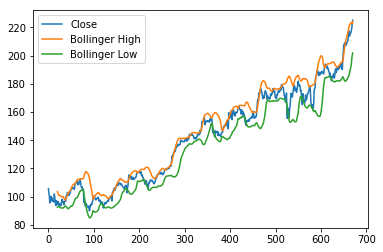

In [6]:
df[['Close','Bollinger High','Bollinger Low']].plot()

C:\Users\Tanvi\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


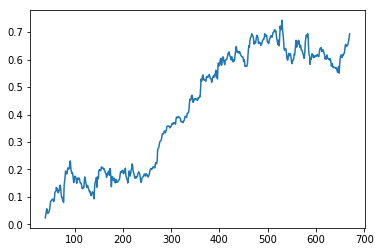

In [7]:
df['Position'] = None
#Fill our newly created position column - set to sell (-1) when the price hits the upper band, and set to buy (1) when it hits the lower band
for row in range(len(df)):
    
    if (df['avg'].iloc[row] > df['Bollinger High'].iloc[row]) and (df['avg'].iloc[row-1] < df['Bollinger High'].iloc[row-1]):
        df['Position'].iloc[row] = 1
        
    if (df['avg'].iloc[row] < df['Bollinger Low'].iloc[row]) and (df['avg'].iloc[row-1] > df['Bollinger Low'].iloc[row-1]):
        df['Position'].iloc[row] = -1  
#Forward fill our position column to replace the "None" values with the correct long/short positions to represent the "holding" of our position
#forward through time
df['Position'].fillna(method='ffill',inplace=True)
#Calculate the daily market return and multiply that by the position to determine strategy returns
df['Market Return'] = np.log(df['avg'] / df['avg'].shift(1))
df['Strategy Return'] = df['Market Return'] * df['Position']
#Plot the strategy returns
df['Strategy Return'].cumsum().plot()

In [9]:
Sharp_ratio = df['Market Return'].mean()/df['Market Return'].std()
A_Sharp_ratio = (670**0.5)*Sharp_ratio
A_Sharp_ratio

2.6128135740955587